In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from bias_and_variance import print_equation, format_equation
from ipywidgets import interact

<div class="alert alert-info">**Hint**: Much of the material covered in this problem is introduced in the Geman et al. (1992) reading. If you are having trouble with the conceptual questions, this might be a good place to look.</div>

We wish to evaluate the performance of a learning algorithm that takes a set of $(x,y)$ pairs as input and selects a function $g(x)$, which predicts the value of $y$ for a given $x$ (that is, for a given $(x,y)$ pair, $g(x)$ should approximate $y$).

We will evaluate the 'fit' of the functions that our learning algorithm selects using the *mean squared error* (MSE) between $g(x)$ and $y$. For a set of $n$ data points $\{ (x_1, y_1), \ldots, (x_n,y_n) \}$, the MSE associated with a function $g$ is calculated as

$$
MSE = \frac{1}{n} \sum_{i=1}^n \left ( y_i - g(x_i) \right )^2 .
$$

The set of candidate functions that we will allow our algorithm to consider is the set of $k$th-order polynomials. This means that our hypothesis space will contain all functions of the form $g(x) = p_kx^k + p_{k-1} x^{k-1} + \ldots + p_{1} x + p_0$. These functions are entirely characterized by their coefficient vector ${\bf p} = (p_k, p_{k-1}, \ldots, p_0)$, and become much more flexible as $k$ increases (think about the difference between linear ($k=1$), quadratic ($k=2$), and cubic ($k=3$) functions). If we are given a set of $(x,y)$ pairs, it is straightforward to find the $k$th-order polynomial that minimizes the MSE between $g(x)$ and the observed $y$ values. 

<div class="alert alert-info">For those who have done some statistics, the calculation for finding ${\bf p}$ is just a case of linear regression where the various powers of $x$ are the predictors</div>

In this problem, we'll be trying to learn the function $g(x)$ that generated some data with the addition of some Gaussian (i.e., normally distributed) noise. The data is a $110\times 2$ array, where the first column corresponds to the $x$ coordinate, and the second column corresponds to the $y$ coordinate (which is the function evaluated at the corresponding $x$ value, i.e. $y = g(x)$.

In [3]:
data = np.load("data/xy_data.npy")

# only show the first ten points, since there are a lot
data[:10]

array([[ 0.05326841,  0.11153722],
       [ 0.09595921,  0.08886825],
       [ 0.33218686,  0.04323005],
       [ 0.36718942,  0.05728251],
       [ 0.52694255,  0.03424077],
       [ 0.56136812,  0.05958364],
       [ 0.71448407,  0.13404962],
       [ 0.69834226,  0.10344032],
       [ 0.96030273,  0.19107459],
       [ 0.88821028,  0.1567958 ]])

You will use this data to train and evaluate your learning algorithm.
  
A "learning algorithm" which finds a polynomial of given degree that minimizes the MSE on a set of $(x,y)$ coordinates is implemented in Python with the `np.polyfit` command. You can use `p = np.polyfit(x, y, k)` to return the coefficient vector ${\bf p}$ for the $k$th-order polynomial $g$ that best fits (i.e., has the smallest $MSE$ on) the $x$ and $y$ coordinates in `x` and `y`.

For example, to fit a 4th-order polynomial to the data:

In [4]:
# fit the 4th order polynomial
p = np.polyfit(data[:, 0], data[:, 1], 4)
print("Vector of coefficients: " + str(p))

# display the resulting equation
print_equation(p)

Vector of coefficients: [ 0.22138257 -0.45087857  0.75871103 -0.43306212  0.12531311]


You can calculate the values of $g$ at a set of $x$ coordinates using the command `np.polyval`. For example, if you wanted to compute $g(x)$ at $x=0$, $x=0.5$, and $x=1$, you could do:

In [5]:
np.polyval(p, np.array([0, 0.5, 1]))

array([ 0.12531311,  0.0559364 ,  0.22146603])

---
## Part A (1 point)

<div class="alert alert-success">Run the following cell to call `make_polynomial_fit_and_graph`, which creates an IPython *widget* that will allow you to explore what happens when you try to fit polynomials of different orders to different subsets of the data. You should read the source code to see how this is accomplished.</div>

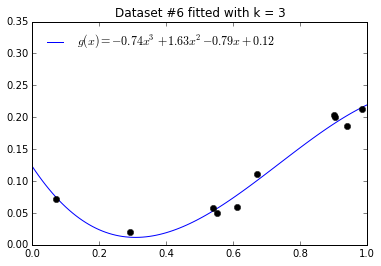

In [6]:
# first load the data
data = np.load("data/xy_data.npy")

@interact
def make_polynomial_fit_and_graph(polynomial_order=(0, 9), training_set_index=(1, 11)):
    """Finds the best-fitting polynomials for k = {0, ... , 9}, 
    using one of eleven different training datasets.
    
    """
    
    # relabel the parameters
    k = polynomial_order
    i = training_set_index
    
    # pull out the x and y values
    x = data[((i - 1) * 10):(i * 10), 0]
    y = data[((i - 1) * 10):(i * 10), 1]
    
    # create the figure
    fig, axis = plt.subplots()

    # create a range of values for x between 0 and 1
    plotx = np.arange(0, 1.01, 0.01)

    # find the coefficients p
    p = np.polyfit(x, y, k)

    # find the values of the polynomial parameterized by p and 
    # evaluated for the points plotx
    ploty = np.polyval(p, plotx)

    # plot the fitted function
    axis.plot(plotx, ploty, 'b-', label="${}$".format(format_equation(p)))

    # plot the original data points
    axis.plot(x, y, 'ko')
    
    # set the axis limits
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 0.35)

    # put a title on each plot
    axis.set_title('Dataset #{} fitted with k = {}'.format(i, k))
    
    # create a legend
    axis.legend(loc='upper left', frameon=False)

<div class="alert alert-success">Examine the figure that is produced. Try changing the widget sliders to change the dataset that we are fitting the polynomial to, and the degree of that polynomial. Which degree polynomial both results in similar fits (i.e. similar coefficients) across all datasets _and_ does a good job at capturing the data? How can this be understood in terms of the bias and variance tradeoff we discussed in class?</div>

If you said that polynomials with order 2 or 3 had the best fit, you got 0.5 points. If you noted that it is best to have neither too few nor too many polynomial terms to ensure that you neither under- nor over-fit your data, you received another 0.5 points.

---
## Part B (1 point)

To get a more quantitative sense of how well each polynomial order fits the data, we'll now compute the actual mean squared error (MSE) of the polynomial fits in relationship to both a *training* dataset and a *testing* dataset.

<div class="alert alert-success">Complete the function `mse` to compute the MSE for a polynomial with order $k$ that has been fitted to the training data. The completed `mse` function should return a tuple containing the MSE values for the training data and the test data.</div>

In [7]:
def mse(k, train, test):
    """Fits a polynomial with order `k` to a training dataset, and 
    then returns the mean squared error (MSE) between the y-values
    of the training data and the fitted polynomial, and the MSE
    between the y-values of the test data and the fitted polynomial.
    
    Your answer can be done in 6 lines of code, including the return
    statement.
    
    Parameters
    ----------
    k : integer
        The polynomial order
    train : numpy array with shape (n, 2)
        The training data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    test : numpy array with shape (m, 2)
        The testing data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
        
    Returns
    -------
    a 2-tuple consisting of the training set MSE and testing set MSE
    
    """
    ### BEGIN SOLUTION
    # compute the polynomial fit
    p = np.polyfit(train[:, 0], train[:, 1], k)
    
    # compute predictions and MSE for the training data
    train_prediction = np.polyval(p, train[:, 0])
    train_mse = np.mean((train_prediction - train[:, 1]) ** 2)  
    
    # compute predictions and MSE for the testing data
    test_prediction = np.polyval(p, test[:, 0])
    test_mse = np.mean((test_prediction - test[:, 1]) ** 2)

    return train_mse, test_mse
    ### END SOLUTION

For example, we can compute the MSE for $k=2$ by using the first ten datapoints as training data, and the other datapoints as testing data, as follows:

In [8]:
# load the data
data = np.load("data/xy_data.npy")

# compute the MSE
train_mse, test_mse = mse(2, data[:10], data[10:])
print("The training error is: " + str(train_mse))
print("The testing error is:  " + str(test_mse))

The training error is: 0.000229744955167
The testing error is:  0.000374298371336


In [9]:
# add your own test cases here!


In [10]:
"""Test that the `mse` function is correct."""
from numpy.testing import assert_allclose

data = np.load("data/xy_data.npy")

# use first ten, and the remaining
assert_allclose(mse(2, data[:10], data[10:]), (0.000229744955167, 0.000374298371336))
assert_allclose(mse(3, data[:10], data[10:]), (0.000169612346303, 0.000463251756094))
assert_allclose(mse(9, data[:10], data[10:]), (1.46448764925e-21, 0.337001581723), atol=1e-20)

# use half-and-half
assert_allclose(mse(2, data[:55], data[55:]), (0.00034502281024316553, 0.00037620706341530435))
assert_allclose(mse(3, data[:55], data[55:]), (0.0003378190977339938, 0.00039980736728858482))
assert_allclose(mse(9, data[:55], data[55:]), (0.00026755111091101571, 0.00061531514687572487))

# use last twenty, and the remaining
assert_allclose(mse(2, data[-20:], data[:-20]), (0.00030881029910697136, 0.00040876086505745344))
assert_allclose(mse(3, data[-20:], data[:-20]), (0.00021713262385879197, 0.00055653317636801015))
assert_allclose(mse(9, data[-20:], data[:-20]), (0.00012210662449207329, 0.00071987940235435685))

print("Success!")

Success!


---
## Part C (1 point)

Next, complete the function template `plot_mse` to plot MSE versus $k$ for both `traindata` and `testdata`. Be sure to include a proper legend, title, and axis labels.

In [11]:
def plot_mse(axis, max_order, train, test):
    """Plot the mean squared error (MSE) for the given training and testing
    data as a function of polynomial order. 
    
    * Your plot should show the MSE for 0 <= k < max_order
    * There should be two lines: one black, for the training set error, and
      one red, for the testing set error.
    * Make sure to include labels for the x- and y- axes.
    * Label the training error and testing error lines as "Training set error" 
      and "Testing set error", respectively. These labels will be used to
      create a legend later on (and so you should NOT actually create the
      legend yourself -- just label the lines).
      
    Your answer can be done in 10 lines of code, including the return statement.
      
    Parameters
    ----------
    axis : matplotlib axis object
        The axis on which to plot the MSE
    max_order : integer
        The maximum polynomial order to compute a fit for
    train : numpy array with shape (n, 2)
        The training data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    test : numpy array with shape (m, 2)
        The testing data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
        
    Returns
    -------
    numpy array with shape (max_order, 2)
        The MSE for the training data (corresponding to the first column) and
        for the testing data (corresponding to the second column). Each row
        corresponds to a different polynomial order.
        
    
    """
    ### BEGIN SOLUTION
    k = np.arange(0, max_order)

    # compute error for all values of k
    error = np.empty((max_order, 2))
    for i in range(max_order):
        error[i] = mse(k[i], train, test)

    axis.plot(k, error[:, 0], 'k-', label="Training set error")
    axis.plot(k, error[:, 1], 'r-', label="Testing set error")
    axis.set_xlabel("Polynomial model order (k)")
    axis.set_ylabel("Mean squared error")
    
    return error
    ### END SOLUTION

After implementing the `plot_mse` function, you should be able to see the error as a function of the polynomial order for both the training set and the test set:

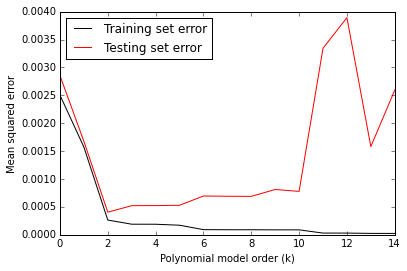

In [12]:
# load the data
data = np.load("data/xy_data.npy")

# plot it
fig, axis = plt.subplots()
plot_mse(axis, 15, data[:20], data[20:])
axis.legend(loc='upper left')

In [13]:
# add your own test cases here!


In [14]:
"""Is the plot_mse function correctly implemented?"""
from nose.tools import assert_equal, assert_not_equal
from numpy.testing import assert_allclose
from plotchecker import get_data

data = np.load("data/xy_data.npy")

# check that it uses the mse function
old_mse = mse
del mse
try:
    fig, axis = plt.subplots()
    plot_mse(axis, 9, data[:10], data[10:])
except NameError:
    pass
else:
    raise AssertionError("plot_mse should call mse, but it does not")
finally:
    plt.close('all')
    mse = old_mse
    del old_mse
    
fig, axis = plt.subplots()
error = plot_mse(axis, 9, data[:10], data[10:])
axis.legend(loc='upper left')

# check the error
assert_equal(error.shape, (9, 2))
assert_allclose(error[0], mse(0, data[:10], data[10:]))
assert_allclose(error[4], mse(4, data[:10], data[10:]))
assert_allclose(error[8], mse(8, data[:10], data[10:]))

# check the plotted data
plotted_data = get_data(axis)
assert_equal(plotted_data.shape, (18, 2))
assert_allclose(plotted_data[:9, 0], np.arange(9))
assert_allclose(plotted_data[9:, 0], np.arange(9))
assert_allclose(plotted_data[:9, 1], error[:, 0])
assert_allclose(plotted_data[9:, 1], error[:, 1])

# check the line colors
assert axis.lines[0].get_color() in ['k', 'black', (0, 0, 0), '#000000']
assert axis.lines[1].get_color() in ['r', 'red', (1, 0, 0), '#FF0000']

# check the legend
legend_labels = [x.get_text() for x in axis.get_legend().get_texts()]
assert_equal(legend_labels, ["Training set error", "Testing set error"])

# check the axis labels
assert_not_equal(axis.get_xlabel(), "")
assert_not_equal(axis.get_ylabel(), "")

plt.close('all')

print("Success!")

Success!


---
## Part D (1 point)

Now, we will use another IPython widget to visualize how the error changes depending on the dataset that we are fitting to. The widget will call your `plot_mse` function with different subsets of the data, depending on the index that is set:

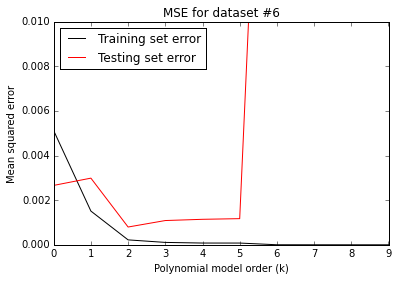

In [15]:
# load the data
data = np.load("data/xy_data.npy")

@interact
def visualize_mse(training_set_index=(1, 11)):
    # relabel the index for convenience
    i = training_set_index
    
    # pull out the training and testing data
    traindata = data[((i - 1) * 10):(i * 10)]
    testdata = np.concatenate([data[:((i - 1) * 10)], data[(i * 10):]])

    # plot the MSE
    fig, axis = plt.subplots()
    plot_mse(axis, 10, traindata, testdata)
    axis.set_ylim(0, 0.01)
    axis.set_title("MSE for dataset #{}".format(i))
    axis.legend(loc='upper left')

<div class="alert alert-success">Try changing the widget slider to explore the error on different datasets. What happens to the MSE on the training sets as the degree of the polynomial (i.e., the size of our hypothesis space) increases? What about on the test sets? Should you always use a learning algorithm that gives the best results on the training set? Justify your answers.</div>

0.25 points were awarded if you discussed how MSE on `traindata` changes with the order of the polynomial model. 0.25 points were awarded if you also did so for `testdata`. 0.25 points were awarded if you discussed whether or not you should assess overall model performance on the MSE calculated on `traindata`. 0.25 points were awarded if you discussed why or why not this is a good idea. A sample answer is included below:

> The MSE calculated on `traindata` continues to decrease with the polynomial model order. When calculated on `testdata`, the MSE decreases until the model order is around 2, then increases for model orders greater than 2. Assessing your model using MSE calculated on the training data is a bad idea. This is because as the complexity of a model increases, it will be better and better able to fit the trends in the training data. Eventually the MSE will go to zero. However, what we really care about is generalization. In other words we want to know how accurately a model will predict for data it has never seen before. This information is provided by instead assessing the MSE on the testing data.

---
## Part E (1 point)
  
The MSE on the test set is an approximation of the *prediction error* associated with a particular learning algorithm. In class we discussed how *expected prediction error* is composed of a bias and a variance term. Both the bias and the variance depend upon the true function, $f$, that we are estimating with our learning algorithm.

* An algorithm with high *bias* will systematically produce predictions that differ from the true function. This can happen in situations where the true function is more complex than the most complex function available to the algorithm.
* An algorithm with high *variance* will produce predictions that can vary wildly depending on the specifics of the dataset we are evaluating. This can happen in situations where the algorithm is able to return functions that are more complex than the true function.

For a more detailed explanation of the bias-variance tradeoff, please take a look at the reading by Geman et al. (1992).

<div class="alert alert-success">Explain how the results from the MSE on `testset` could be explained in terms of the bias and variance of the learning algorithms involved. That is, in which cases does the bias of the learning algorithm dominate the MSE? In which cases does the variance dominate? Explain *why* either the bias or variance matters more in these different cases.</div>

You are going to see high variance when you are attempting to overfit the data, because you will be treating what is noise in the original function as signal in your estimate of that function. You are going to see larger amounts of bias when you are inappropriately constraining the model to identify what is true signal in the underlying function as noise in the data. Specifically, larger bias corresponds to the lower degree polynomials and larger variance corresponds to the higher degree polynomials (which are respectively less and more complex than the true underlying function).